In [2]:
!pip install -qqq openpyxl

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import spacy

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Automated Indic Headline and Sentence Generator_BRIDGEi2i_IIT Tech Meet.docx
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Readme
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Headline_similarity_scores.ipynb
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Development Data/dev_data_article.xlsx
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Development Data/dev_data_tweet.xlsx
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Data Dictionary/data dictionary.txt
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Sample_Output/sample_output_2.csv
/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Sample_Output/sample_output_1.csv


In [4]:
article = pd.read_excel("/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Development Data/dev_data_article.xlsx")
tweet = pd.read_excel("/kaggle/input/interiitahsg/IIT tech meet 2021_BRIDGEi2i_NLP/Development Data/dev_data_tweet.xlsx")

In [5]:
article

,Text_ID,Text,Headline,Mobile_Tech_Flag
0,article_0001,Digitisation is one of the key buzzwords in th...,Pakistan’s digital landscape post-Covid,0
1,article_0002,Increase in tolerance limit up to 120 per cent...,Affordable housing gets shot in the arm,0
2,article_0003,Home > News > World Sports News\n\nJonas Lossl...,Jonas Lossl leaves Everton to rejoin first clu...,0
3,article_0004,"Source: Agfax.com\n\nBy Keith Brown, DTN Contr...",DTN Cotton Closing: Cotton Higher on Commoditi...,0
4,article_0005,"United Nations, Feb 4: The Serum Institute of ...","Serum Institute of India, UNICEF enter into lo...",0
...,...,...,...,...
3995,article_3996,All Hindi Bloggers List with All Detail\nMay 1...,All Hindi Bloggers List with All Detail,0
3996,article_3997,"Amazon Flex se Part Time me Earn kare ₹15,000 ...","Amazon Flex se Part Time me Earn kare ₹15,000 ...",0
3997,article_3998,Bad Link Building Strategies se Kaise Bachaye ...,Bad Link Building Strategies se Kaise Bachaye ...,0
3998,article_3999,Badiya Comment karte Samay Rakhe in Baat ka Dh...,Badiya Comment karte Samay Rakhe in Baat ka Dh...,0


In [9]:
tweet.rename(columns={'Mobile_Tech_Tag':'Mobile_Tech_Flag', 'Tweet':'Text'}, inplace=True)
tweet

,Tweet_ID,Text,Mobile_Tech_Flag
0,tweet_0001,You'll 💜 my #PitchWars book if you like: 🦋 hat...,0
1,tweet_0002,RT @SkySportsNews: 🚨 Breaking: #WBA have reach...,0
2,tweet_0003,RT @stealyoman_cuso: really says a lot about s...,0
3,tweet_0004,RT @PGtzsche1: HPV vaccines increased serious ...,0
4,tweet_0005,Ramaphosa says if you are positive you must se...,0
...,...,...,...
3995,tweet_3996,RT @ZeeNews: चीनी मोबाइल कंपनी रियलमी ने अपना ...,1
3996,tweet_3997,RT @ZeeNews: चीनी मोबाइल कंपनी रियलमी ने अपना ...,1
3997,tweet_3998,चीनी मोबाइल कंपनी रियलमी ने अपना Realme V15 5G...,1
3998,tweet_3999,QT @AnjaliSingh_IN: Aapne phone hi galat choos...,1


In [10]:
article['Mobile_Tech_Flag'].value_counts()

0    3026
1     974
Name: Mobile_Tech_Flag, dtype: int64

In [11]:
tweet['Mobile_Tech_Flag'].value_counts()

0    3000
1    1000
Name: Mobile_Tech_Flag, dtype: int64

In [12]:
article_texts = article.Text.apply(lambda x: ' '.join(x.split())).to_list()

In [33]:
article_texts_len = article.Text.apply(lambda x: len(x.split())).to_list()
tweet_texts_len = tweet.Text.apply(lambda x: len(x.split())).to_list()

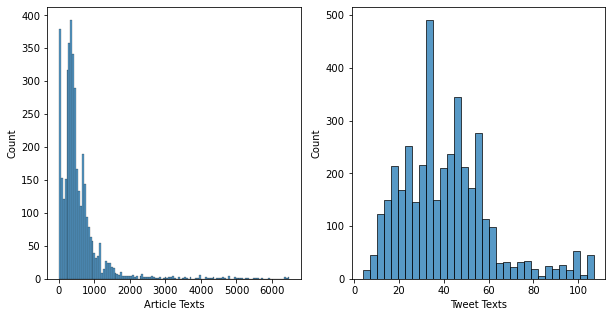

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(article_texts_len, ax=axs[0]);
sns.histplot(tweet_texts_len, ax=axs[1]);

axs[0].set_xlabel("Article Texts");
axs[1].set_xlabel("Tweet Texts");

In [51]:
print("--"*50,"\ntweet text\n","--"*50,'\n')
for text in tweet.iloc[:5,1]:
    print(text, end='\n\n\n')

    
print("--"*50,"\narticle text\n","--"*50,'\n')
for text in article.iloc[:3,1].apply(lambda x: ' '.join(x.split())).to_list():
    print(text, end='\n\n')

---------------------------------------------------------------------------------------------------- 
tweet text
 ---------------------------------------------------------------------------------------------------- 

You'll 💜 my #PitchWars book if you like: 🦋 hate-to-love 🦋 #OwnVoices Ace/Aro rep 🦋 subdued mythology 🦋 ride-or-die queerplatonic bonds 🦋 fast pace, high risk 🦋 star and plant imagery everywhere 🦋 getting punched in your emotions 🌿#PWParty20⏱️ https://t.co/mDTSG4DLG5


RT @SkySportsNews: 🚨 Breaking: #WBA have reached a verbal agreement with #AFC in the last hour over a loan deal for Ainsley Maitland-Niles. @RobDorsettSky adds he will undergo a medical in London in the next couple of hours. #DeadlineDay 🤝


RT @stealyoman_cuso: really says a lot about society that we are half way thru a snow storm and not a single man has offered to risk his life to eat my ass by candle light


RT @PGtzsche1: HPV vaccines increased serious nervous system disorders, risk ratio 1.49 (1.02 to 2

In [54]:
tweet.loc[tweet["Tweet_ID"]=="tweet_645326"]

Series([], Name: Text, dtype: object)

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)